# Titanic EDA, Feature Engineering 

Bu notebook, Titanic veri seti üzerinde kapsamlı bir EDA çalışması ve temel feature engineering uygulamalarını içerir. Amaç, hayatta kalma oranlarını etkileyen faktörleri anlamak ve makine öğrenimi modelleri için temiz, anlamlı bir veri seti oluşturmaktır.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Exploratory Data Analysis (EDA)

Bu bölümde veri setini tanıyacak, eksikleri temizleyecek, sayısal/kategorik dağılımları inceleyeceğiz.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Sur

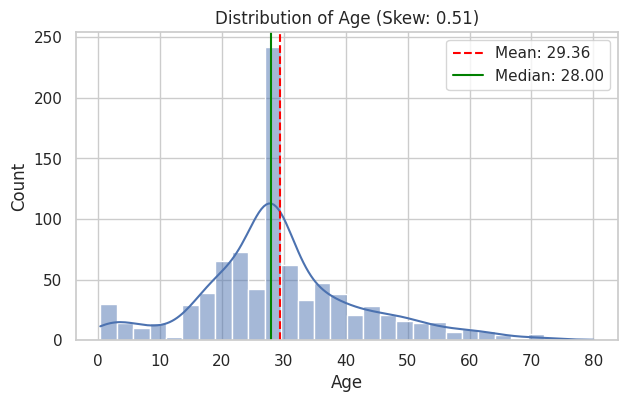

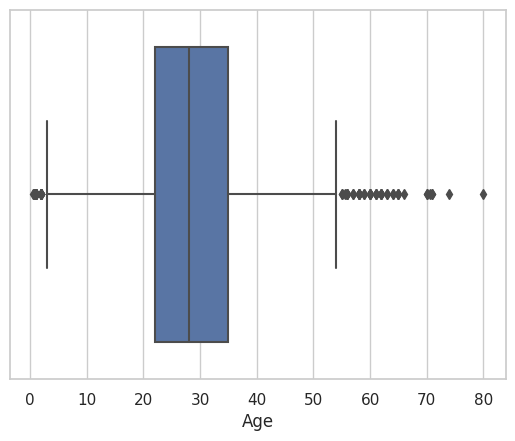

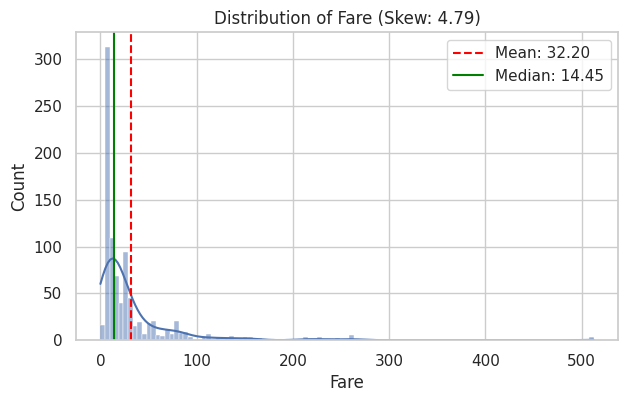

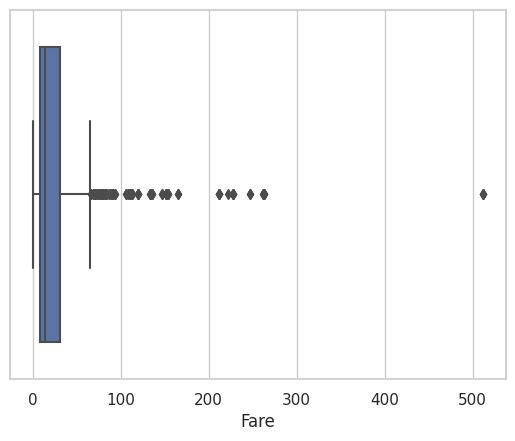

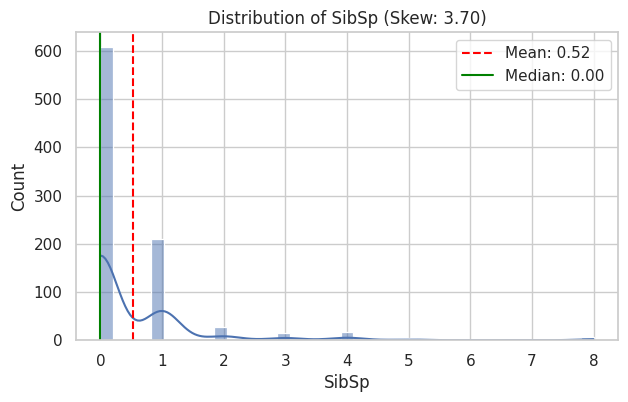

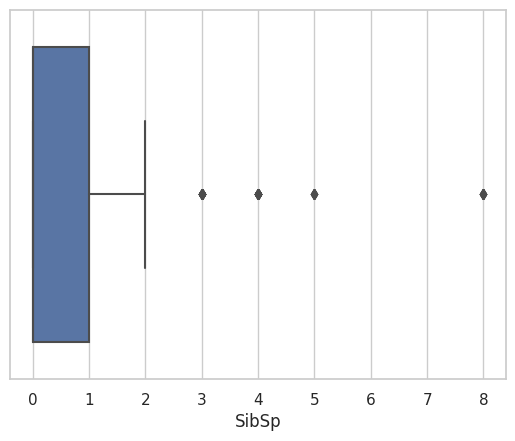

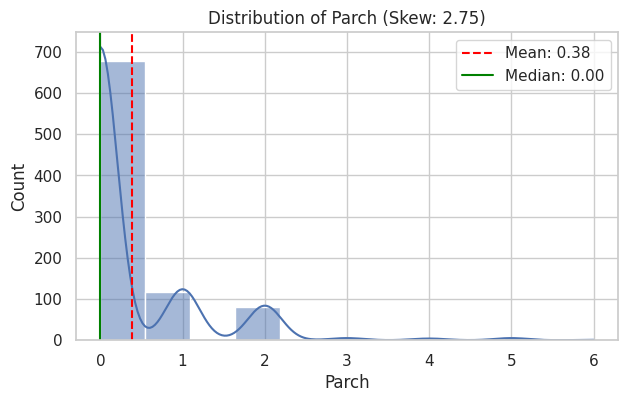

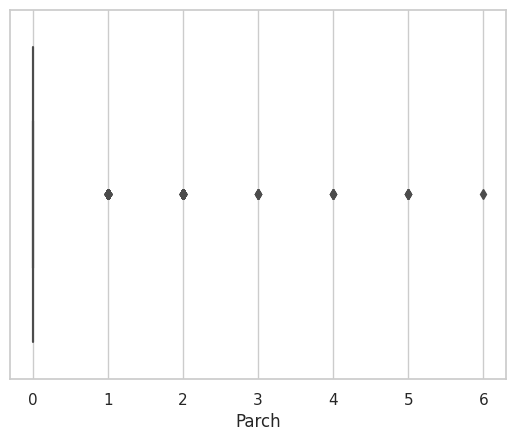

        mean  median    std   min     max  skew
Age    29.36   28.00  13.02  0.42   80.00  0.51
Fare   32.20   14.45  49.69  0.00  512.33  4.79
SibSp   0.52    0.00   1.10  0.00    8.00  3.70
Parch   0.38    0.00   0.81  0.00    6.00  2.75

 AgeGroup range:
               count  percentage
AgeGroup                        
young(18-29)     448       50.28
adult(30-49)     256       28.73
senior(50-80)     74        8.31
child(0-11)       68        7.63
teen(12-17)       45        5.05


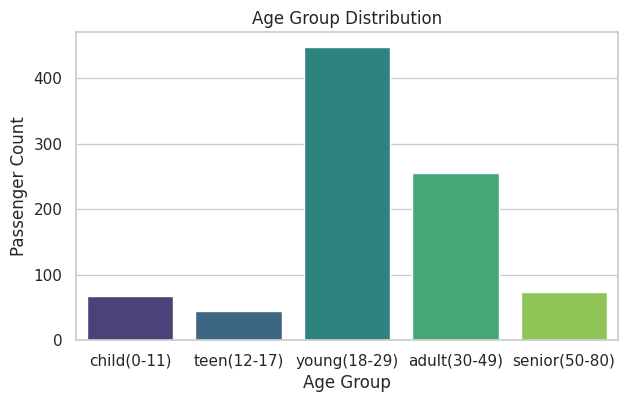


Fare range:
                   count  percentage
FareBin                             
(7.854, 10.5]        184       20.65
(21.679, 39.688]     180       20.20
(-0.001, 7.854]      179       20.09
(39.688, 512.329]    176       19.75
(10.5, 21.679]       172       19.30

Survived range:
          count  percentage
Survived                   
0           549       61.62
1           342       38.38

Sex range:
        count  percentage
Sex                      
male      577       64.76
female    314       35.24

Pclass range:
        count  percentage
Pclass                   
3         491       55.11
1         216       24.24
2         184       20.65

Embarked range:
          count  percentage
Embarked                   
S           646       72.50
C           168       18.86
Q            77        8.64


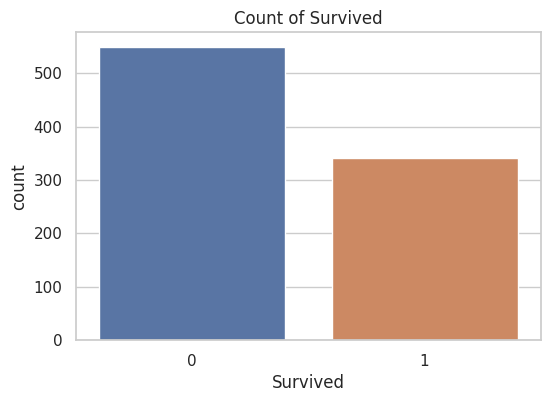

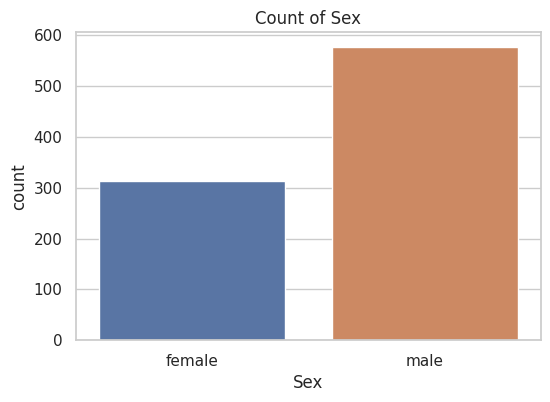

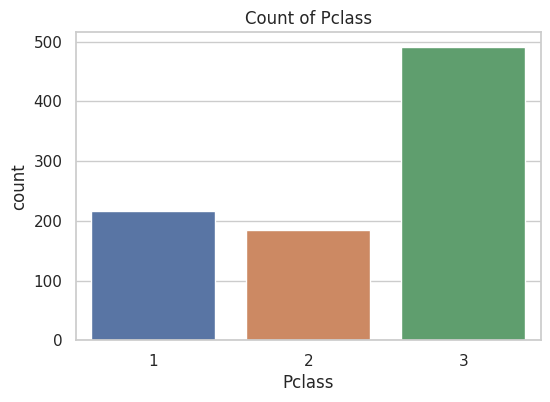

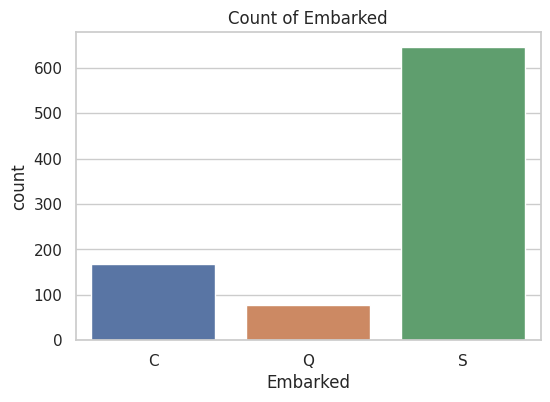


Survived range: 0.384  (~%38.4)

Sex - Survived (row %):
Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89


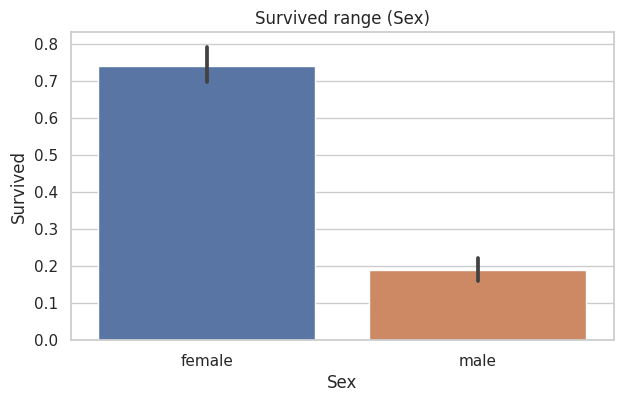


Pclass - Survived (row %):
Survived      0      1
Pclass                
1         37.04  62.96
2         52.72  47.28
3         75.76  24.24


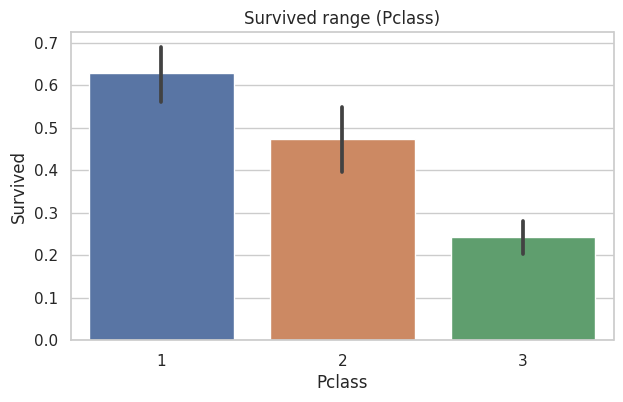


Embarked - Survived (row %):
Survived      0      1
Embarked              
C         44.64  55.36
Q         61.04  38.96
S         66.10  33.90


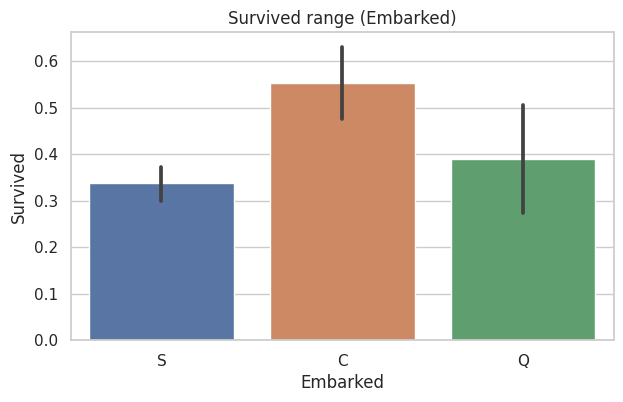


Pclass - Sex (row %):
Sex     female   male
Pclass               
1        43.52  56.48
2        41.30  58.70
3        29.33  70.67
Sex vs Survived p-value: 0.00000 | min expected: 120.53
Pclass vs Survived p-value: 0.00000 | min expected: 70.63
Embarked vs Survived p-value: 0.00000 | min expected: 29.56

Age - Survived (row %):
Survived           0      1
AgeGroup                   
child(0-11)    42.65  57.35
teen(12-17)    51.11  48.89
young(18-29)   67.19  32.81
adult(30-49)   58.20  41.80
senior(50-80)  63.51  36.49


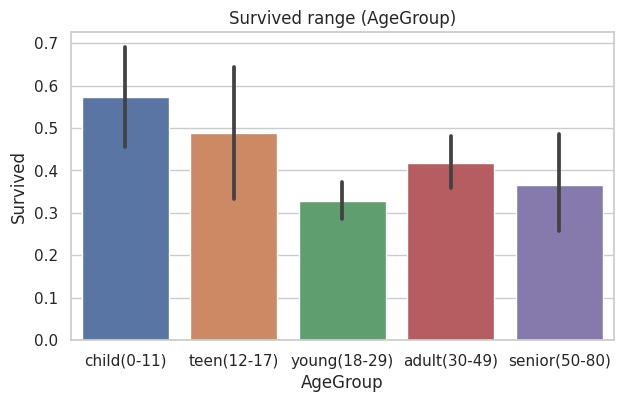


Fare - Survived (row %):
Survived               0      1
FareBin                        
(-0.001, 7.854]    78.21  21.79
(7.854, 10.5]      79.89  20.11
(10.5, 21.679]     57.56  42.44
(21.679, 39.688]   55.56  44.44
(39.688, 512.329]  35.80  64.20


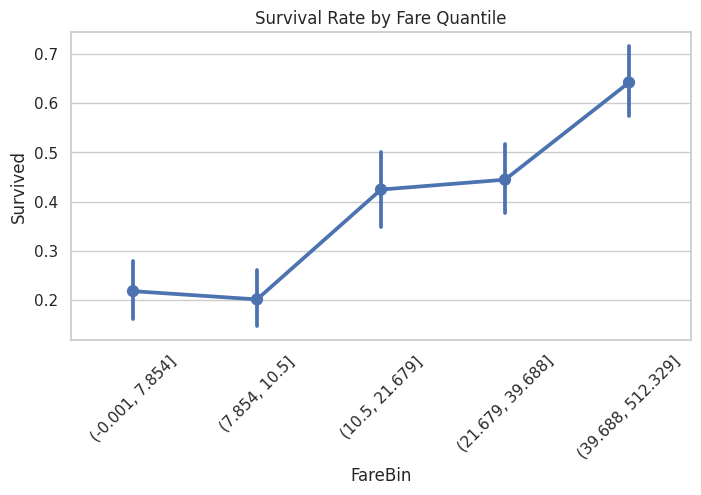

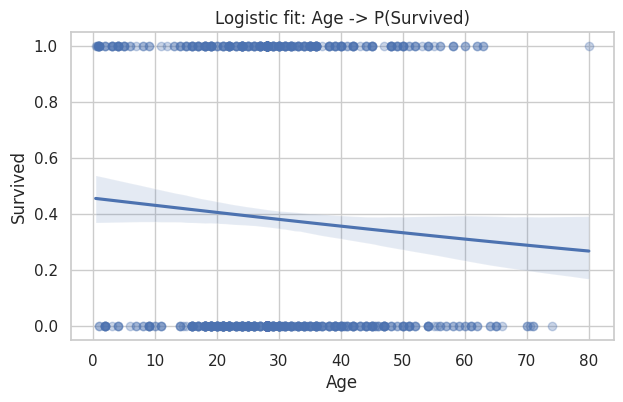

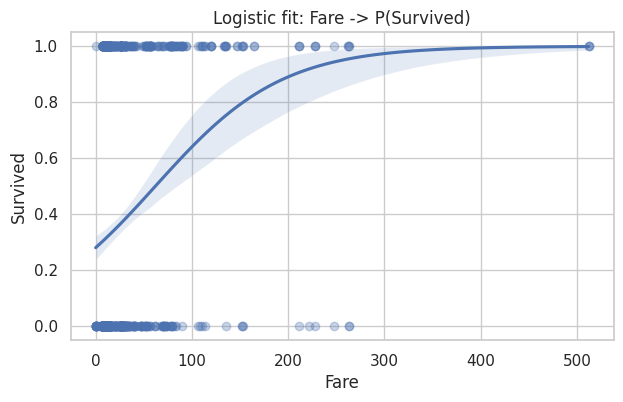


SibSp - Survived (row %)
Survived       0      1
SibSp                  
0          65.46  34.54
1          46.41  53.59
2          53.57  46.43
3          75.00  25.00
4          83.33  16.67
5         100.00   0.00
8         100.00   0.00


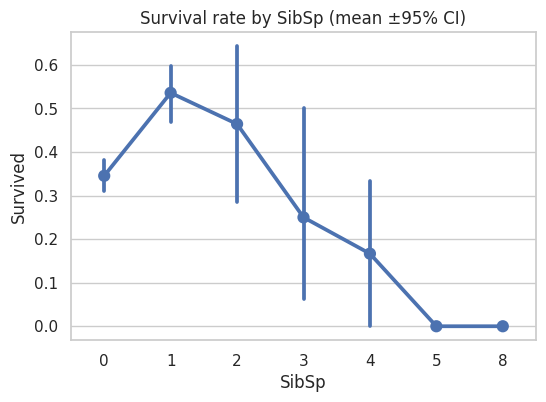

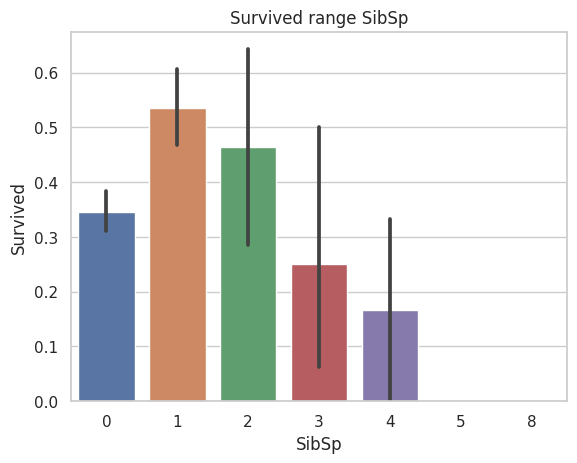


Parch - Survived (row %)
Survived       0      1
Parch                  
0          65.63  34.37
1          44.92  55.08
2          50.00  50.00
3          40.00  60.00
4         100.00   0.00
5          80.00  20.00
6         100.00   0.00


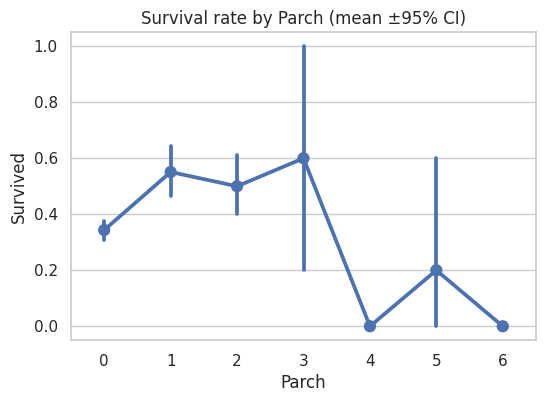

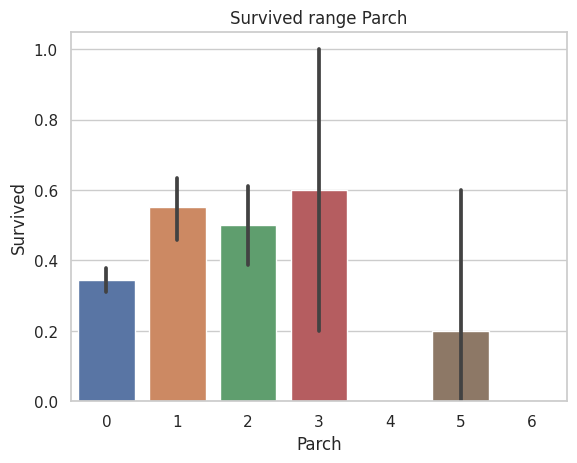

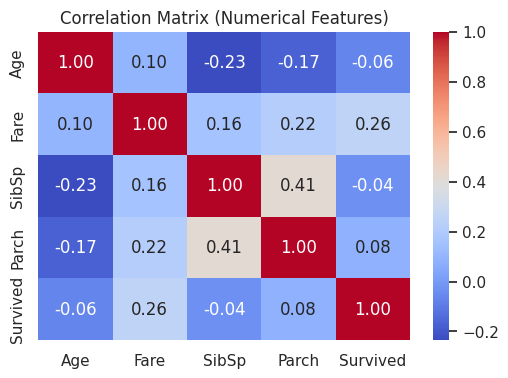

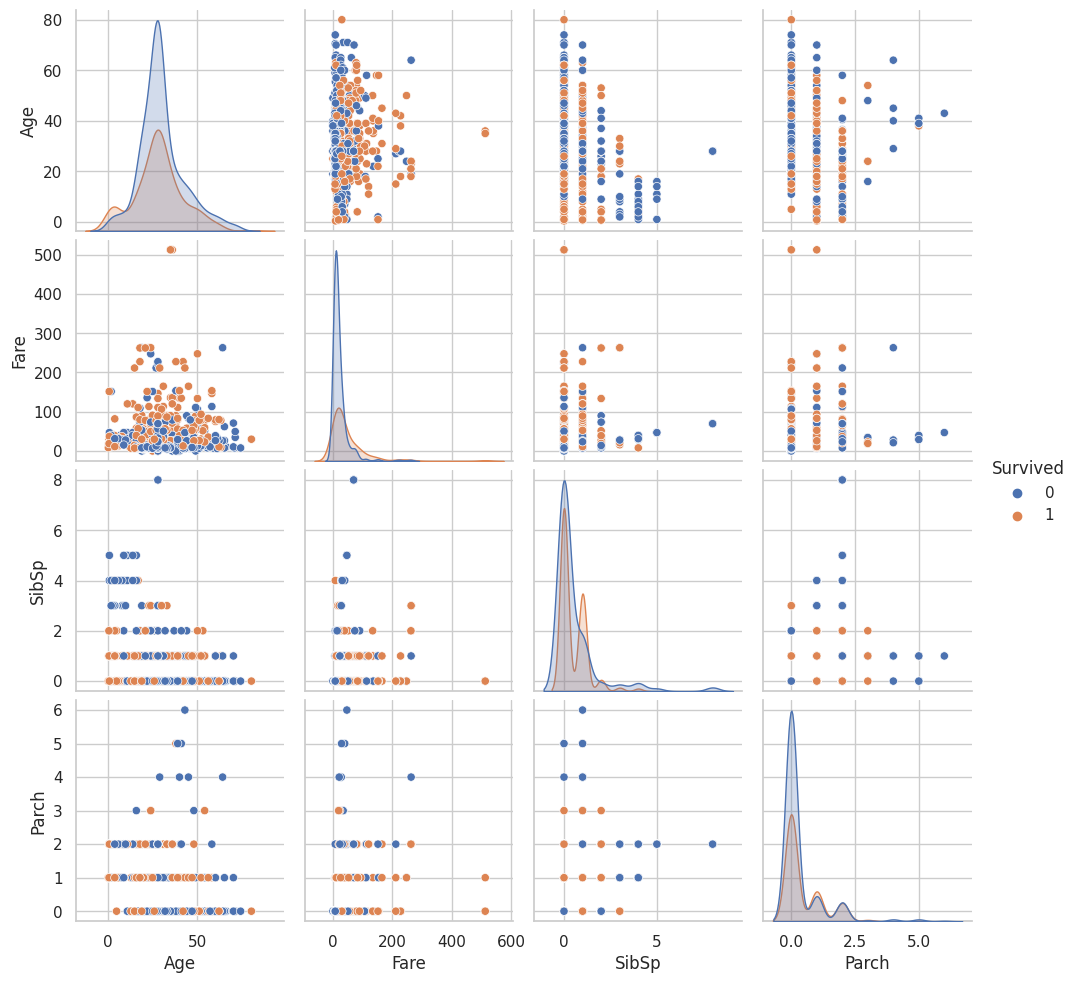

Age vs Survived → p-value: 0.26967
Fare vs Survived → p-value: 0.00000
SibSp vs Survived → p-value: 0.00802
Parch vs Survived → p-value: 0.00004


In [14]:
df.info()
df.describe()
df.isnull().sum()
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')


df.drop(columns=['Cabin'], inplace=True)
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

#Name ve Ticket sütunları doğrudan sayısal değil; feature extraction aşamasında değerlendirilmek üzere bırakıldı.

print(df.isnull().sum().sum())  # Toplam eksik 0 olmalı
df.info()

#Yukarıdaki bilgiler veri setinin yapısını özetlemektedir. Age, Cabin ve Embarked kolonlarında eksik değerlerin bulunduğu görülmektedir.
#Cabin değişkeni çok seyrek olduğu için modellingde kullanılmayacaktır.
#Age eksik değerleri doldurulacaktır.
# skew ≈ 0 olmali Görselde kırmızı çizgi (mean) ile yeşil çizgi (median) birbirine ne kadar yakınsa dağılım o kadar simetrik demektir.
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    mean_val = df[col].mean()
    median_val = df[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', label=f"Mean: {mean_val:.2f}")
    plt.axvline(median_val, color='green', linestyle='-', label=f"Median: {median_val:.2f}")
    plt.legend()
    plt.title(f"Distribution of {col} (Skew: {df[col].skew():.2f})")
    plt.show()
    sns.boxplot(x=df[col])
    plt.show()
    

#sns.boxplot(x=df['Fare'])
#plt.show()

minmaxval=df[numeric_cols].agg(['min', 'max'])
num_summary = df[numeric_cols].agg(['mean','median','std','min','max','skew']).T
print(num_summary.round(2))


bins = [0, 12, 18, 30, 50, df['Age'].max()+1]
labels = ['child(0-11)','teen(12-17)','young(18-29)','adult(30-49)','senior(50-80)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
summary = df['AgeGroup'].value_counts()
perc = df['AgeGroup'].value_counts(normalize=True) * 100
combined = pd.concat([summary, perc.round(2)], axis=1)
combined.columns = ['count', 'percentage']
#print("age group null count:",df['AgeGroup'].isnull().sum()) #0 olmali kapsadigindan emin olmak icin
print("\n AgeGroup range:")
print(combined)

#Graph
plt.figure(figsize=(7,4))
sns.countplot(x='AgeGroup', data=df, order=labels, palette='viridis')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Passenger Count")
plt.show()


df['FareBin'] = pd.qcut(df['Fare'], q=5, duplicates='drop')
summary = df['FareBin'].value_counts()
perc = df['FareBin'].value_counts(normalize=True) * 100
combined = pd.concat([summary, perc.round(2)], axis=1)
combined.columns = ['count', 'percentage']
print("\nFare range:")
print(combined)


# ### Numeric Variables Summary

# - Age: Young en fazla(%50.28) Ortalama 29.7, median 28  hafif sağa çarpık (skew=0.39). Yaş dağılımı dengeli, birkaç yaşlı yolcu outlier olarak görülüyor.
# - Fare: Ortalama 32.2, median 14.5 → aşırı sağa çarpık (skew=4.79). Düşük fiyatlı biletler baskın, ancak birkaç çok yüksek değer (512 £) mevcut.
# - SibSp (kardeş/eş sayısı): Ortalama 0.52, median 0 → çoğu yolcu yalnız seyahat etmiş. 5+ değerler outlier.
# - Parch (ebeveyn/çocuk sayısı): Ortalama 0.38, median 0 → çoğu yolcu tek başına, birkaç büyük aile örneği var.
# - Ölçek: Fare 0–512, diğerleri 0–80 arasında. Bu fark ileride model eğitiminde ölçekleme (standardization) gerektirebilir.


categorical_cols = ['Survived','Sex','Pclass','Embarked']

for col in categorical_cols:
    summary = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    combined = pd.concat([summary, perc.round(2)], axis=1)
    combined.columns = ['count', 'percentage']
    print(f"\n{col} range:")
    print(combined)

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count of {col}")
    plt.show()

###### Categorical Variables Summary

# - Survived: 0 (%61.6) > 1 (%38.4)  dengesiz hedef sınıf.
# - Sex: Erkek (%64.8) baskın kadın oranı daha düşük.
# - Pclass: En çok 3. sınıf yolcu (%55); 1. ve 2. sınıf daha az.
# - Embarked: Yolcuların çoğu Southampton (S) limanından binmiş (%72).


### Bivariate Analysis ###

base_rate = df['Survived'].mean()
print(f"\nSurvived range: {base_rate:.3f}  (~%{base_rate*100:.1f})")


#survived - sex
sex_rate = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
print("\nSex - Survived (row %):")
print(sex_rate.round(2))

# Graph
plt.figure(figsize=(7,4))
sns.barplot(x='Sex', y='Survived', data=df, estimator=np.mean)
plt.title('Survived range (Sex)')
plt.show()
# - Survived: Female(%35.24) -> (%74.2) > Male(%64.76) -> (%18.89) 

#survived - pclass
pclass_rate = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
print("\nPclass - Survived (row %):")
print(pclass_rate.round(2))

# Graph
plt.figure(figsize=(7,4))
sns.barplot(x='Pclass', y='Survived', data=df, estimator=np.mean)
plt.title('Survived range (Pclass)')
plt.show()
# - Survived: 1.class(%24.24) -> (%62.96) > 2.class(%20.65) -> (%47.28) > 3.class(%55.11) -> (%24.24)

#survived - embarked
emb_rate = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
print("\nEmbarked - Survived (row %):")
print(emb_rate.round(2))

# Graph
plt.figure(figsize=(7,4))
sns.barplot(x='Embarked', y='Survived', data=df, estimator=np.mean, order=df['Embarked'].value_counts().index)
plt.title('Survived range (Embarked)')
plt.show()
# - Survived: C(%18.86) -> (%55.36) > Q(%8.64) -> (%38.96) > S(%72.50) -> (%33.90)

#pclass - sex
sex_rate = pd.crosstab(df['Pclass'], df['Sex'], normalize='index') * 100
print("\nPclass - Sex (row %):")
print(sex_rate.round(2))



#survived - categorical pvalue
from scipy.stats import chi2_contingency

cat_vars = ['Sex', 'Pclass', 'Embarked']

for col in cat_vars:
    table = pd.crosstab(df[col], df['Survived'])
    chi2, p, dof, exp = chi2_contingency(table)
    print(f"{col} vs Survived p-value: {p:.5f} | min expected: {exp.min():.2f}")
# p < 0.05 ise ilişki istatistiksel olarak anlamlıdır.



#survived - age
age_rate = pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index') * 100
print("\nAge - Survived (row %):")
print(age_rate.round(2))

# Graph
plt.figure(figsize=(7,4))
sns.barplot(x='AgeGroup', y='Survived', data=df, estimator=np.mean, order=labels)
plt.title('Survived range (AgeGroup)')
plt.show()
# - Survived: Child(%7.63) -> (%57.35) > Teen(%5.05) -> (%48.89) > Adult(%28.73) -> (%41.80)
#   Young(%50.28) -> (%32.81) > Senior(%8.31) -> (%36.49)


#survived - fare
fare_rate = pd.crosstab(df['FareBin'], df['Survived'], normalize='index') * 100
print("\nFare - Survived (row %):")
print(fare_rate.round(2))

# Graph
plt.figure(figsize=(8,4))
sns.pointplot(x='FareBin', y='Survived', data=df, estimator=np.mean, errorbar=('ci',95))
plt.title("Survival Rate by Fare Quantile")
plt.xticks(rotation=45)
plt.show()
# - Survived: F5(%19.75) -> (%64.2) > F4(%20.20) -> (%44.44) > F3(%19.3) -> (%42.44)
#   F1(%20.09) -> (%21.79) > F2(%20.65) -> (%20.11)


# Logistic eğri
plt.figure(figsize=(7,4))
sns.regplot(x='Age', y='Survived', data=df, logistic=True, scatter_kws={'alpha':0.3})
plt.title("Logistic fit: Age -> P(Survived)")
plt.show()

plt.figure(figsize=(7,4))
sns.regplot(x='Fare', y='Survived', data=df, logistic=True, scatter_kws={'alpha':0.3})
plt.title("Logistic fit: Fare -> P(Survived)")
plt.show()





# ayrik numeric
disc_cols = ['SibSp', 'Parch']
for col in disc_cols:
    print(f"\n{col} - Survived (row %)")
    tab = pd.crosstab(df[col], df['Survived'], normalize='index') * 100
    print(tab.round(2))
# Graph
    plt.figure(figsize=(6,4))
    sns.pointplot(x=col, y='Survived', data=df, estimator=np.mean, errorbar=('ci',95))
    plt.title(f"Survival rate by {col} (mean ±95% CI)")
    plt.show()
    sns.barplot(x=col, y='Survived', data=df, estimator=np.mean)
    plt.title(f"Survived range {col}")
    plt.show()



#numeric corr
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols + ['Survived']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


sns.pairplot(df[['Age','Fare','SibSp','Parch','Survived']], hue='Survived')
plt.show()




#survived - numeric pvalue
#carpik dagilim icin non-parametrik test
from scipy.stats import mannwhitneyu
num_vars = ['Age', 'Fare', 'SibSp', 'Parch']
for col in num_vars:
    x0 = df.loc[df['Survived']==0, col]
    x1 = df.loc[df['Survived']==1, col]
    stat, p = mannwhitneyu(x0, x1, alternative='two-sided')
    print(f"{col} vs Survived → p-value: {p:.5f}")



### Exploratory Data Analysis Summary

# - Eksik veriler temizlendi, veri seti modellemeye hazır.
# - Numerik değişkenler incelendi: Fare aşırı çarpık, Age dengeli.
# - Age mantıksal aralıklarla, Fare eşit örneklemli qcut ile bölündü.
# - Kategorik değişkenler içinde Sex ve Pclass hayatta kalma oranlarını en güçlü etkileyen faktörlerdir.
# - Fare, SibSp ve Parch değişkenleri de anlamlı farklar göstermiştir (p<0.05).
# - Logistic eğriler Fare’de güçlü pozitif eğilim, Age’de zayıf negatif eğilim göstermiştir.

# 2. Feature Engineering  
Bu bölümde yeni değişkenler oluşturuyoruz:  
- FamilySize  
- IsAlone  
- Title extraction  
- Pclass_Sex  
- AgeGroup  
- Fare_log  


count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamilySize, dtype: float64
FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64
FamilySize - Survived (row %):
 Survived         0      1
FamilySize               
1            69.65  30.35
2            44.72  55.28
3            42.16  57.84
4            27.59  72.41
5            80.00  20.00
6            86.36  13.64
7            66.67  33.33
8           100.00   0.00
11          100.00   0.00


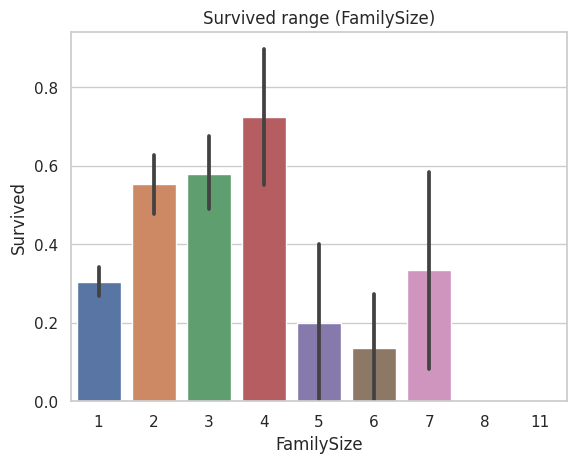


IsAlone - Survived (row %):
 Survived      0      1
IsAlone               
0         49.44  50.56
1         69.65  30.35


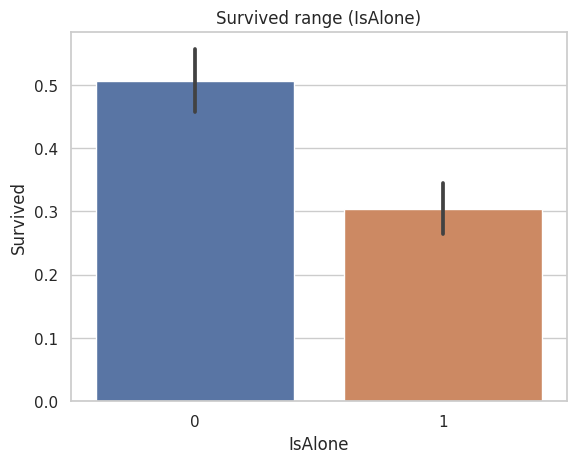

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royal        5
Name: count, dtype: int64

Title - Survived (row %):
 Survived      0      1
Title                 
Master    42.50  57.50
Miss      29.73  70.27
Mr        84.33  15.67
Mrs       20.63  79.37
Officer   72.22  27.78
Royal     40.00  60.00


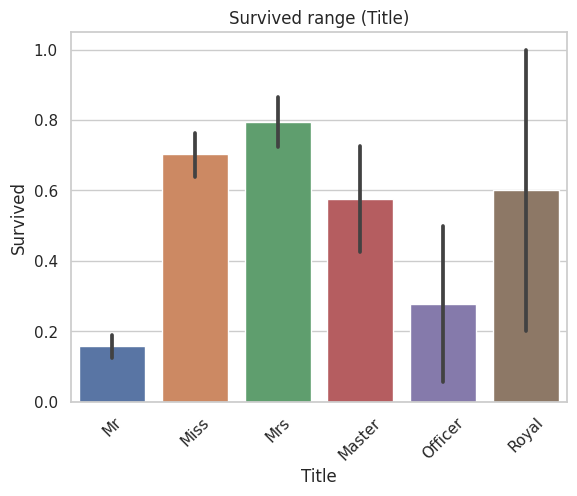

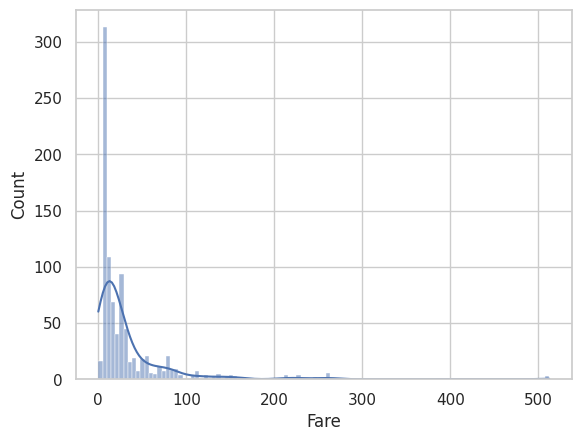

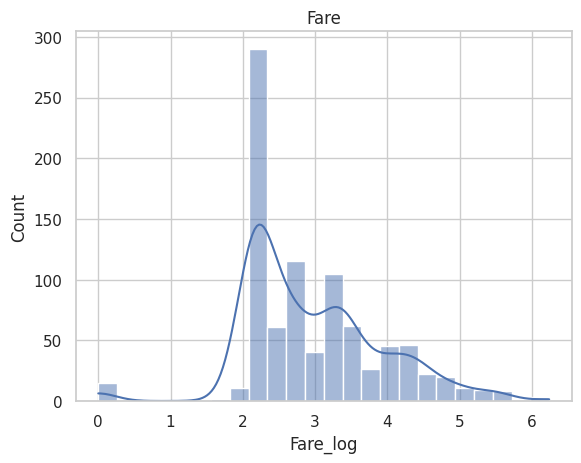


Pclass_Sex - Survived (row %):
 Survived        0      1
Pclass_Sex              
1_female     3.19  96.81
1_male      63.11  36.89
2_female     7.89  92.11
2_male      84.26  15.74
3_female    50.00  50.00
3_male      86.46  13.54

Child_Sex - Survived (row %):
 Survived       0      1
Child_Sex              
0_female   24.11  75.89
0_male     83.55  16.45
1_female   40.62  59.38
1_male     44.44  55.56
IsAlone → p=0.00000
Title → p=0.00000
Pclass_Sex → p=0.00000
Child_Sex → p=0.00000


In [15]:
df = pd.read_csv("/kaggle/input/d/bzeydanli/titanic/titanic_clean.csv")
df.head()

#Family edit
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df['FamilySize'].describe())
print(df['FamilySize'].value_counts())

# FamilySize Survived
fs_rate = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index') * 100
print("FamilySize - Survived (row %):\n", fs_rate.round(2))

#Graph Survived - FamilySize
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survived range (FamilySize)')
plt.show()
# Yalnız yolcular düşük hayatta kalma oranına sahip,
# ama küçük aile grupları (özellikle 2–4 kişi) yüksek oranda kurtulmuş



# IsAlone Survived
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
ia_rate = pd.crosstab(df['IsAlone'], df['Survived'], normalize='index') * 100
print("\nIsAlone - Survived (row %):\n", ia_rate.round(2))

#Graph Survived - IsAlone
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survived range (IsAlone)')
plt.show()



#Title edit
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df['Title'].value_counts())

title_map = {
    'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs', 'Lady':'Royal', 'Countess':'Royal',
    'Capt':'Officer', 'Col':'Officer', 'Major':'Officer', 'Dr':'Officer', 'Rev':'Officer',
    'Sir':'Royal', 'Don':'Royal', 'Dona':'Royal', 'Jonkheer':'Royal'
}

df['Title'] = df['Title'].replace(title_map)
print(df['Title'].value_counts())

#rare_titles = df['Title'].value_counts()[df['Title'].value_counts() < 10].index
#df['Title'] = df['Title'].replace(rare_titles, 'Rare')

# Title Survived
title_rate = pd.crosstab(df['Title'], df['Survived'], normalize='index') * 100
print("\nTitle - Survived (row %):\n", title_rate.round(2))
#Graph Survived - Title
sns.barplot(x='Title', y='Survived', data=df, order=df['Title'].value_counts().index)
plt.title('Survived range (Title)')
plt.xticks(rotation=45)
plt.show()


sns.histplot(df['Fare'], kde=True)
plt.show()
df['Fare_log'] = np.log1p(df['Fare'])
sns.histplot(df['Fare_log'], kde=True)
plt.title("Fare")
plt.show()






# Pclass x Child × Sex -Survived
df['IsChild'] = (df['Age'] < 12).astype(int)
df['Child_Sex'] = df['IsChild'].astype(str) + "_" + df['Sex'].astype(str)
df['Pclass_Sex'] = df['Pclass'].astype(str) + "_" + df['Sex'].astype(str)

for col in ['Pclass_Sex',"Child_Sex"]:
    rate = pd.crosstab(df[col], df['Survived'], normalize='index') * 100
    print(f"\n{col} - Survived (row %):\n", rate.round(2))




from scipy.stats import chi2_contingency

for col in ['IsAlone','Title',"Pclass_Sex","Child_Sex"]:
    tab = pd.crosstab(df[col], df['Survived'])
    chi2, p, dof, exp = chi2_contingency(tab)
    print(f"{col} → p={p:.5f}")

df.drop(columns=['IsChild'], inplace=True)
df.drop(columns=['Child_Sex'], inplace=True)
# Çocuk olmak hayatta kalma üzerinde anlamlı bir fark yaratmıyor,
# cinsiyet ve sınıf kombinasyonu daha etkili